## 1 Neural Networks and Universal Approcimation Theorem

### 1.1 1D Bump

In [32]:
w11_1=1000
w21_1=1000
b1=-400
b2=-600
w11_2=1
w12_2=-1

In [33]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [34]:
import numpy as np

xs = np.arange(0, 1, 0.01)
y = []
for x in xs:
    y.append(w11_2*sigmoid(w11_1*x+b1)+w12_2*sigmoid(w21_1*x+b2))

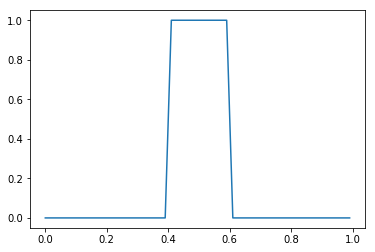

In [35]:
import matplotlib.pyplot as plt

plt.plot(xs, y)

### 1.2a 2D Bump

In [76]:
w11_1=1000
w21_1=1000
b1=-300
b2=-700
w11_2=1
w12_2=-1

In [105]:
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
y = []
for _x1 in x1:
    y.append(w11_2*sigmoid(w11_1*_x1+b1)+w12_2*sigmoid(w21_1*_x1+b2))

y = np.array(y)
y = np.tile(y, (100, 1))

x1, x2 =np.meshgrid(x1, x2)

Text(0.5,0,'f(x)')

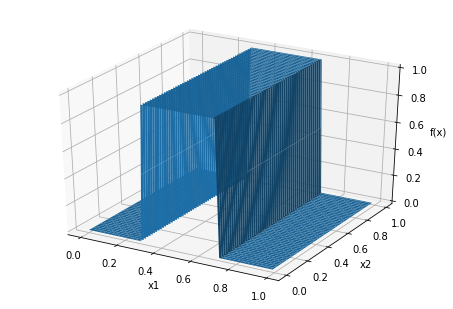

In [106]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, x2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

### 1.2b Tower Function

In [183]:
w11_1=1000
w21_1=1000
w31_1=1000
w41_1=1000
b1=-400
b2=-600
b3=-400
b4=-600
w11_2=100
w12_2=-100
w13_2=100
w14_2=-100
b=-150

In [184]:
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
y = np.zeros(shape=(100, 100))
for i in range(100):
    for j in range(100):
        y[i][j]=sigmoid(w11_2*sigmoid(w11_1*x1[i]+b1)+w12_2*sigmoid(w21_1*x1[i]+b2) \
        +w13_2*sigmoid(w31_1*x2[j]+b3)+w14_2*sigmoid(w41_1*x2[j]+b4)+b)

x1, x2 =np.meshgrid(x1, x2)

Text(0.5,0,'f(x)')

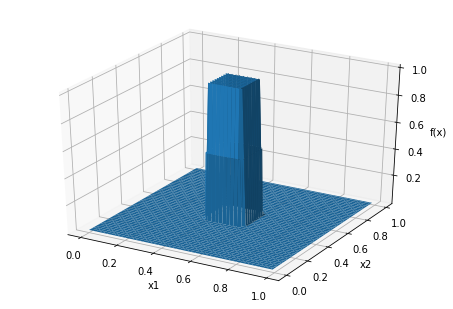

In [185]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, x2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

## 2 EM

### EM algorithm implementation

In [3]:
m=6
n=100
theta1=0.8
theta2=0.3
num=5

X = np.zeros(shape=(m, n))

import random

#sampling
for i in range(m):
    rand = random.randint(0,9)
    if(rand < 5):
        X[i] = np.random.binomial(1, theta1, size=n)
    else:
        X[i] = np.random.binomial(1, theta2, size=n)

X=np.sum(X, axis=1)

_theta1 = 0.5
_theta2 = 0.5

def e_step(x_i, theta1, theta2, k):
    temp1 = pow(theta1, x_i)*pow(1-theta1, n-x_i)
    temp2 = pow(theta2, x_i)*pow(1-theta2, n-x_i)
    if(k == 1):
        return temp1/(temp1+temp2)
    else:
        return temp2/(temp1+temp2)

def m_step(X, theta1, theta2, k):
    numerator = denominator = 0
    for i in range(m):
        temp = e_step(X[i], theta1, theta2, k)
        numerator += temp*X[i]/n
        denominator += temp
    return numerator/denominator

for i in range(num):
    print('theta1: ', _theta1, ', theta2: ', _theta2)
    _theta1 = m_step(X, _theta1, _theta2, 1)
    _theta2 = m_step(X, _theta1, _theta2, 2)

theta1:  0.5 , theta2:  0.5
theta1:  0.7133333333333333 , theta2:  0.3600010071099431
theta1:  0.7839999999998021 , theta2:  0.3600000000000035
theta1:  0.784 , theta2:  0.3600000000000035
theta1:  0.784 , theta2:  0.3600000000000035


## 3 Clustering

### 3.a k-means implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
np.random.seed(2018)

% matplotlib inline

In [11]:
X = np.loadtxt('data.csv',delimiter=',')
print(f'Shape of dataset: {X.shape}')

Shape of dataset: (443, 2)


In [7]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters
    
    def fit(self, data):
        n_samples, _ = data.shape
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)
        
        old_assigns = None
        n_iters = 0
        
        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]
            
            if new_assigns == old_assigns:
                return new_assigns, self.centers
            
            old_assigns = new_assigns
            n_iters += 1
            
            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)
    
    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists
    
    def classify(self, datapoint):
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)
    
    def plot_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=new_assigns)
        plt.show()

In [92]:
kmeans = KMeans(n_clusters=2)
new_assigns, centers = kmeans.fit(X)

print(new_assigns)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 

In [93]:
print(centers)

[[0.28639575 0.43987188]
 [0.71934657 0.53760382]]


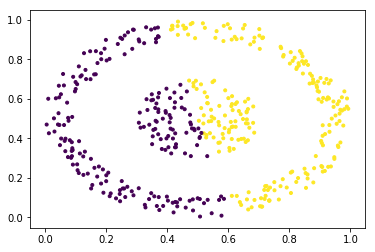

In [94]:
kmeans.plot_clusters(X)

### 3.b hierarchical agglomerative clustering algorithm implementation

In [126]:
import math

class AGNES():
    def __init__(self, n_clusters=4):
        self.k = n_clusters
        
    def fit(self, data):
        C = []
        M = []
        
        for i in data:
            Ci = []
            Ci.append(i)
            C.append(Ci)
        
        for i in C:
            Mi = []
            for j in C:
                Mi.append(self.dist_min(i, j))
            M.append(Mi)
            
        q = len(data)
        while q > self.k:
            print(q, end=" ")
            x, y = self.find_Min(M)
            C[x].extend(C[y])
            C.pop(y)
            
            M = []
            for i in C:
                Mi = []
                for j in C:
                    Mi.append(self.dist_min(i, j))
                M.append(Mi)
            q -= 1
            
        return C
            
    def dist(self, a, b):
        return np.linalg.norm(a-b)
    
    def dist_min(self, Ci, Cj):
        return min(self.dist(i, j) for i in Ci for j in Cj)
    
    def find_Min(self, M):
        min_dist = 1000
        x = 0
        y = 0
        for i in range(len(M)):
            for j in range(len(M[i])):
                if i != j and M[i][j] < min_dist:
                    min_dist = M[i][j]
                    x = i
                    y = j
        return x, y

In [127]:
agnes = AGNES(n_clusters=2)
C = agnes.fit(X)

443 442 441 440 439 438 437 436 435 434 433 432 431 430 429 428 427 426 425 424 423 422 421 420 419 418 417 416 415 414 413 412 411 410 409 408 407 406 405 404 403 402 401 400 399 398 397 396 395 394 393 392 391 390 389 388 387 386 385 384 383 382 381 380 379 378 377 376 375 374 373 372 371 370 369 368 367 366 365 364 363 362 361 360 359 358 357 356 355 354 353 352 351 350 349 348 347 346 345 344 343 342 341 340 339 338 337 336 335 334 333 332 331 330 329 328 327 326 325 324 323 322 321 320 319 318 317 316 315 314 313 312 311 310 309 308 307 306 305 304 303 302 301 300 299 298 297 296 295 294 293 292 291 290 289 288 287 286 285 284 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 

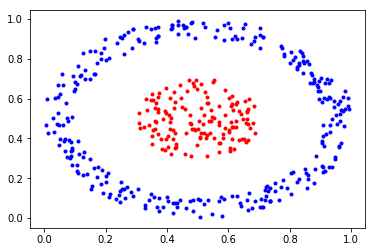

In [158]:
C0 = [arr.tolist() for arr in C[0]]
C0 = np.array(C0)

C1 = [arr.tolist() for arr in C[1]]
C1 = np.array(C1)

plt.scatter(C0[:, 0], C0[:, 1], marker='.', c='r')
plt.scatter(C1[:, 0], C1[:, 1], marker='.', c='b')

plt.show()

### 3.d Pre-process the dataset to help boost the performance of k-means algorithm on this particular dataset

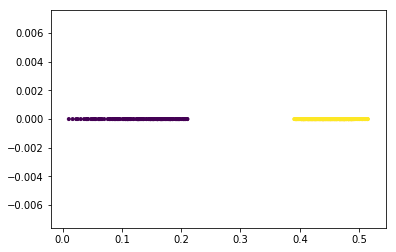

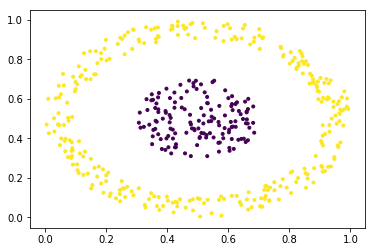

In [48]:
_X = np.copy(X)
_X -= np.mean(X, axis = 0)
x,y = _X[:,0], _X[:,1]
r = np.sqrt(x**2+y**2)
_X = np.column_stack((r, np.zeros(len(r))))

kmeans = KMeans(n_clusters=2)
new_assigns, centers = kmeans.fit(_X)

kmeans.plot_clusters(_X)
kmeans.plot_clusters(X)